# Cross validation and simple linear regression.

##### Predicting salaries of employees using linear regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import sem
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

salary_data = pd.read_csv('salary.csv')
salary_meta = pd.read_csv('Salary metadata.csv', sep=';')


In [2]:
display(salary_data)
display(salary_meta)


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


## 1. Spliting data into a training and test set. Examining the training data for missing and extreme values. Creating histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary.

#### Checking if there are any missing values

In [3]:
salary_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

 one missing values from salary column

#### Filling the missing value with the mean

In [4]:
salary_data['salary'].fillna(salary_data['salary'].mean(),inplace=True)

In [5]:
# confirmation from missing values
salary_data.isnull().sum().sum()

0

##### Data correlation

In [6]:
salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


The columns Yearsworked, Yearsrank and Position have high correlation

#### splitting the dataset

In [7]:
x = salary_data
y = salary_data['salary']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


In [9]:
# shape of training data set
x_train.shape

(359, 11)

In [10]:
# linear regression
stats.pearsonr(x_train['yearsworked'],y_train)

(0.6060480089102418, 2.266003579670928e-37)

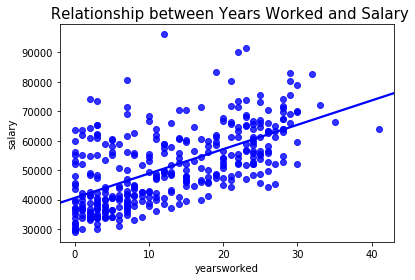

In [11]:

#plotting scatter plot
sns.regplot(x='yearsworked', y='salary', color='b', data= x_train, ci= None)
plt.title(" Relationship between Years Worked and Salary", fontsize= 15)
plt.show()

Text(0, 0.5, 'Frequency')

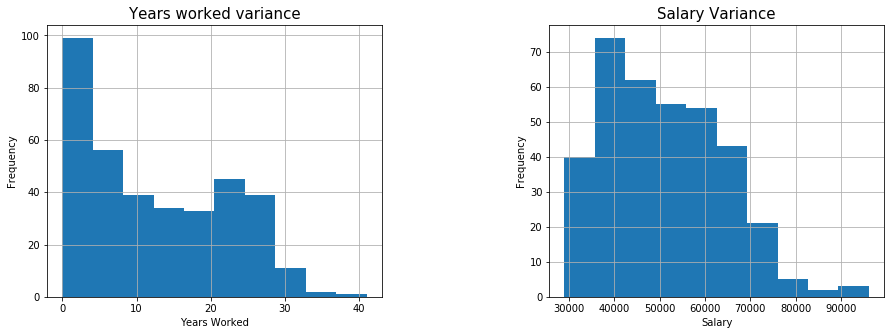

In [12]:
#plotting histogram & subplotting
f, axes = plt.subplots(1, 2,figsize=(15, 5))
grid = plt.GridSpec(1, 2, wspace=0.5, hspace=0.3)
plt.subplot(grid[0, 0])
x_train['yearsworked'].hist()
plt.title('Years worked variance', fontsize= 15)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')

plt.subplot(grid[0, 1])
y_train.hist()
plt.title('Salary Variance', fontsize= 15)
plt.xlabel('Salary')
plt.ylabel('Frequency')

In [13]:
#creating model
x_train = sm.add_constant(x_train['yearsworked'])
lm = sm.OLS(y_train, x_train).fit()

### 2. The statsmodels package and the training data, running a simple linear regression for Salary with one predictor variable: Years Worked

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.27e-37
Time:                        08:03:56   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Reporting the amount of variance explained (R^2) and significance value (p) 

In [15]:
print('R-squared: ', lm.rsquared)


R-squared:  0.3672941891040684


In [16]:
print('P-value: ', lm.pvalues)

P-value:  const          6.960403e-148
yearsworked     2.266004e-37
dtype: float64



R-squared is 0.3672 this means is 37%, this indicates that the variables are closely related to each other.

A p-value weighs the strength of the evidence (i.e what the data tells you about the population). A value of <0.05 implies significance and that of <0.01 implies high significance. Therefore, our p-value being =0.000 implies high significance. Therefore we can conclude that it is statistically significan

## 3. What the unstandardized coefficient (B or ‘coef’ in statsmodels) tells about the relationship between Years Worked and Salary.

An unstandardized coefficient represents the amount of change in a dependent variable Y due to a change of 1 unit of independent variable X. So in our case is true the salary does increase with years worked when we look at our graphs above

## 4. 95% confidence intervals [0.025, 0.975] means:
Our coefficients fall within the confidence interval range. Although we dont have 100% certainty, we are 95% confident that the values are valid.

## 5. The expected salary for someone with 12 years’ work experience.

In [17]:
lm.predict([1,12])

array([50503.90080319])

expected salary = 50503.90

## 6. The expected salary for someone with 80 years’ work experience.

In [18]:
lm.predict([1,80])

array([106749.83660639])

expected salary for someone over 80 years = 106749.84

* It is very unlikely for a person to work for 80 years

## 7.  Other employee characteristics might influence their salary

According to the correlation tablt above in Question 1, years ranked and position occupied are moderatly - strongly correlated to salary recieved.

In [24]:
rmse_train=rmse(y_train, lm.predict(x_train))
rmse_test=rmse(y_test, lm.predict(x_test))
print('The rmse  for the train set is :' ,rmse_train)
print('The rmse  for the test set is :',rmse_test)
print('the difference in RMSE between training and testing is:', rmse_test - rmse_train)